<a href="https://colab.research.google.com/github/SUDHARSSHINI/DV/blob/main/DV_Bicycle_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bicycle Lane Distribution Case Study

## Problem Statement
The goal of this case study is to examine the distribution and connectivity of bicycle lanes and paths in a given area. The objective is to promote safer and more efficient cycling routes by analyzing the existing infrastructure.

## Dataset Details
We will use a GeoJSON or shapefile dataset containing information about bicycle lanes and paths. The dataset can be obtained from OpenStreetMap by extracting data on bicycle paths and lanes using Overpass Turbo.

Dataset Link: [OpenStreetMap](https://www.openstreetmap.org/)

## Methodology
1. Data Acquisition:
   - We will use Overpass Turbo to extract data related to bicycle lanes and paths in the study area.
   - The extracted data will be saved in a GeoJSON or shapefile format.

2. Data Exploration:
   - We will load the dataset into our Jupyter Notebook and use geospatial libraries to explore its contents.
   - We'll examine the attributes of the bicycle lanes and paths.

3. Data Analysis:
   - We will perform geospatial analysis to determine the distribution and connectivity of bicycle lanes.
   - This may involve calculating route lengths, connectivity metrics, and identifying areas with limited or no bicycle infrastructure.

4. Visualization:
   - We will create maps and visualizations to present our findings.
   - This will help stakeholders and the public better understand the state of bicycle lanes in the area.

5. Recommendations:
   - Based on our analysis, we will provide recommendations for improving bicycle infrastructure to enhance safety and efficiency.

## Findings
[Add your findings and insights here.]

## Conclusion
[Summarize the results and the impact of the study.]

By following this template, you can create a well-documented and informative case study in Colab. Once you've completed the notebook, you can upload it to GitHub to share it with others. To upload the Colab notebook to GitHub, you can save it as a .ipynb file and then push it to a GitHub repository. Be sure to include the dataset or a link to where it can be obtained.


In [ ]:
!pip install -U googlemaps


  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40713 sha256=7e70f76ae7c1f7c2d2a468be6df9e70ad4b33b36483647b52e7c58a008a46d6f
  Stored in directory: /root/.cache/pip/wheels/17/f8/79/999d5d37118fd35d7219ef57933eb9d09886c4c4503a800f84
Successfully built googlemaps


  The above command is used to install or upgrade a Python package named googlemaps

In [ ]:
!pip install osmnx geopandas matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 1.8 MB/s eta 0:00:00


By running the command !pip install osmnx geopandas matplotlib in a Colab cell:

We are instructing the Colab environment to use pip to install the specified Python packages: osmnx, geopandas, and matplotlib.

These packages are essential for working with geospatial data, analyzing OpenStreetMap data, and creating data visualizations. Installing them ensures that we have the necessary libraries to perform such tasks in your Colab notebook.

In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt


You can use osmnx in your Colab notebook to perform geospatial analyses on OpenStreetMap data. This includes tasks like downloading street networks, analyzing urban infrastructure, and generating maps.

geopandas is useful for working with geospatial data in Colab. You can load and manipulate geospatial datasets, perform geospatial operations, and create GeoDataFrames for spatial data analysis.

matplotlib is essential for creating various types of data visualizations, including line plots, bar charts, and maps. It allows you to present your geospatial and other data effectively.

To use these libraries in a Colab notebook, you can run the import statements as shown in your code cell. After importing these libraries, you can write code to access and analyze geospatial data, create plots and maps, and perform geospatial analyses as needed for your project.

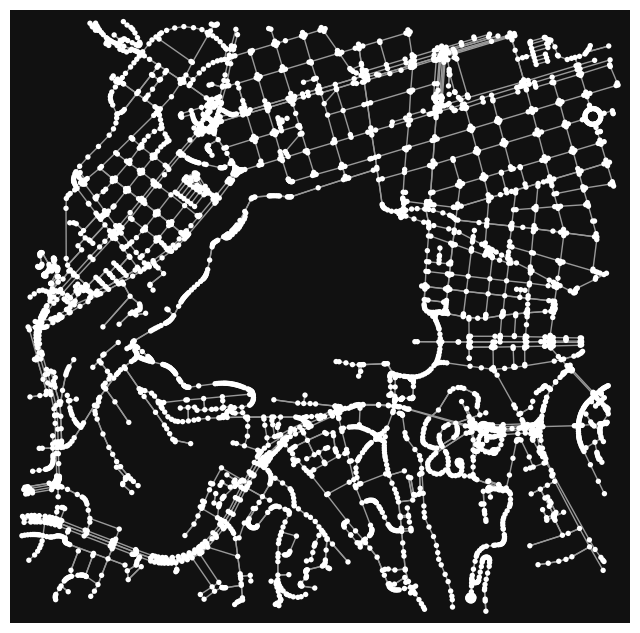

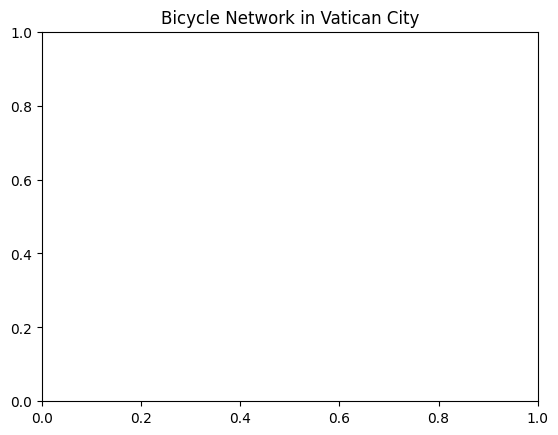

In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Specify Vatican City's coordinates (latitude and longitude)
latitude = 41.9029
longitude = 12.4534

# Download the bicycle network data for Vatican City
G = ox.graph_from_point((latitude, longitude), dist=1000, network_type='bike', simplify=False)

# Create nodes and edges GeoDataFrames and fill in all edge geometry attributes
nodes, edges = ox.graph_to_gdfs(G, fill_edge_geometry=True)

# Create a MultiDiGraph from the GeoDataFrames
G2 = ox.graph_from_gdfs(nodes, edges, graph_attrs=G.graph)

# Verify that edge geometry attributes exist
for u, v, data in G2.edges(keys=False, data=True):
    assert 'geometry' in data

# Plot the bicycle network
fig, ax = ox.plot_graph(ox.project_graph(G2))
plt.title('Bicycle Network in Vatican City')
plt.show()


The above code explains:
  Importing Libraries:

The code imports the necessary libraries:
osmnx as ox: This library allows you to work with OpenStreetMap (OSM) data, including downloading, analyzing, and visualizing geospatial data.
geopandas as gpd: geopandas is used for handling and analyzing geospatial data in a tabular, GeoDataFrame format.
matplotlib.pyplot as plt: matplotlib is a popular data visualization library, and matplotlib.pyplot is used to create plots and charts.
Specify Vatican City's Coordinates:

The code specifies the latitude and longitude coordinates for Vatican City (latitude = 41.9029, longitude = 12.4534). These coordinates will be used to download the bicycle network data for this specific location.
Download Bicycle Network Data:

The ox.graph_from_point() function from the osmnx library is used to download the bicycle network data for Vatican City. It specifies the location (latitude and longitude), a distance of 1000 meters from the specified point, and the network type as 'bike' to download the bicycle network.
The simplify parameter is set to False to ensure that the network is not simplified or pruned. This means all detailed information about the bicycle network is retained.
Create GeoDataFrames:

The code uses ox.graph_to_gdfs() to create two GeoDataFrames: one for nodes and one for edges. These GeoDataFrames contain geospatial information about the nodes and edges of the bicycle network.
The fill_edge_geometry=True option fills in geometry attributes for the edges, ensuring that the geometries of the edges are included.
Create a MultiDiGraph from GeoDataFrames:

The ox.graph_from_gdfs() function is used to create a MultiDiGraph (a directed graph with multiple edges) from the nodes and edges GeoDataFrames.
This step allows you to work with the bicycle network as a graph data structure.
Verify Edge Geometry Attributes:

A loop is used to verify that edge geometry attributes exist for all edges in the created MultiDiGraph.
Plot the Bicycle Network:

The ox.plot_graph() function from the osmnx library is used to plot the bicycle network. It takes the MultiDiGraph and plots it.
The ox.project_graph() function is applied to the graph before plotting to project it correctly.
Finally, the matplotlib library is used to display the graph as a map.

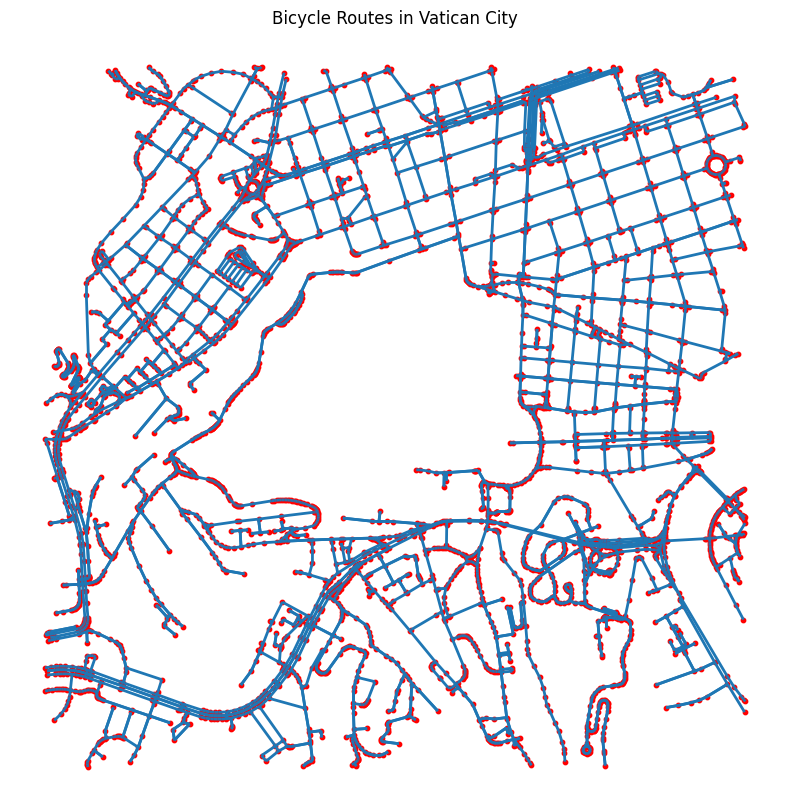

In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Specify Vatican City's coordinates (latitude and longitude)
latitude = 41.9029
longitude = 12.4534

# Download the bicycle network data for Vatican City
G = ox.graph_from_point((latitude, longitude), dist=1000, network_type='bike', simplify=False)

# Create nodes and edges GeoDataFrames and fill in all edge geometry attributes
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

# Plot the bicycle routes
fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=2, edgecolor='tab:blue')
nodes.plot(ax=ax, markersize=10, color='red')
plt.title('Bicycle Routes in Vatican City')
plt.axis('off')
plt.show()


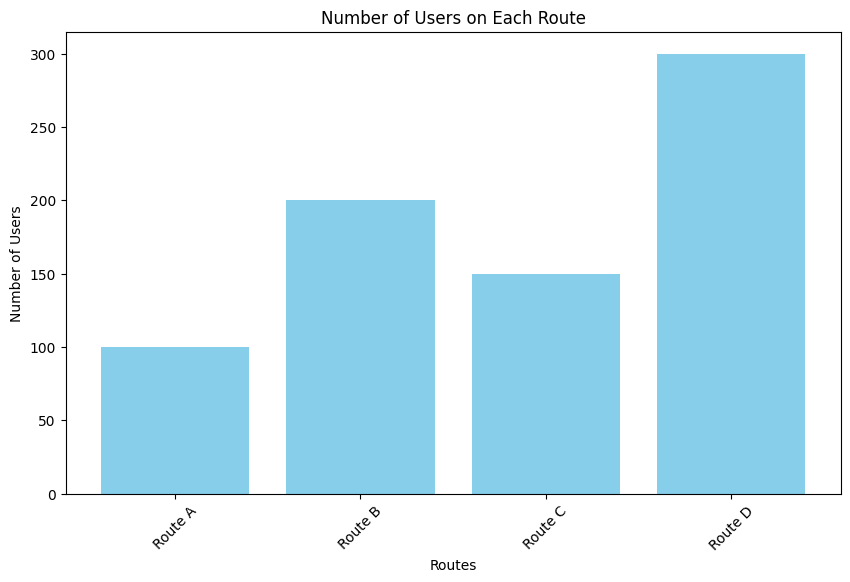

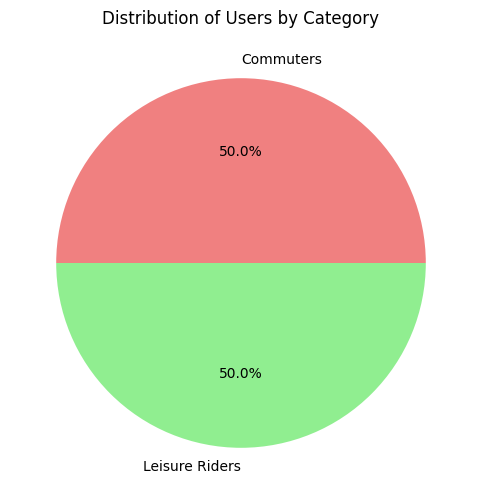

In [ ]:
import matplotlib.pyplot as plt

# Sample route data with user counts
route_names = ['Route A', 'Route B', 'Route C', 'Route D']
user_counts = [100, 200, 150, 300]

# Sample user category data
user_categories = ['Commuters', 'Leisure Riders', 'Commuters', 'Leisure Riders']

# Bar chart: Number of users on each route
plt.figure(figsize=(10, 6))
plt.bar(route_names, user_counts, color='skyblue')
plt.xlabel('Routes')
plt.ylabel('Number of Users')
plt.title('Number of Users on Each Route')
plt.xticks(rotation=45)
plt.show()

# Pie chart: Distribution of users by category
category_counts = {}
for category in user_categories:
    if category in category_counts:
        category_counts[category] += 1
    else:
        category_counts[category] = 1

categories = list(category_counts.keys())
category_values = list(category_counts.values())

plt.figure(figsize=(6, 6))
plt.pie(category_values, labels=categories, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Users by Category')
plt.show()


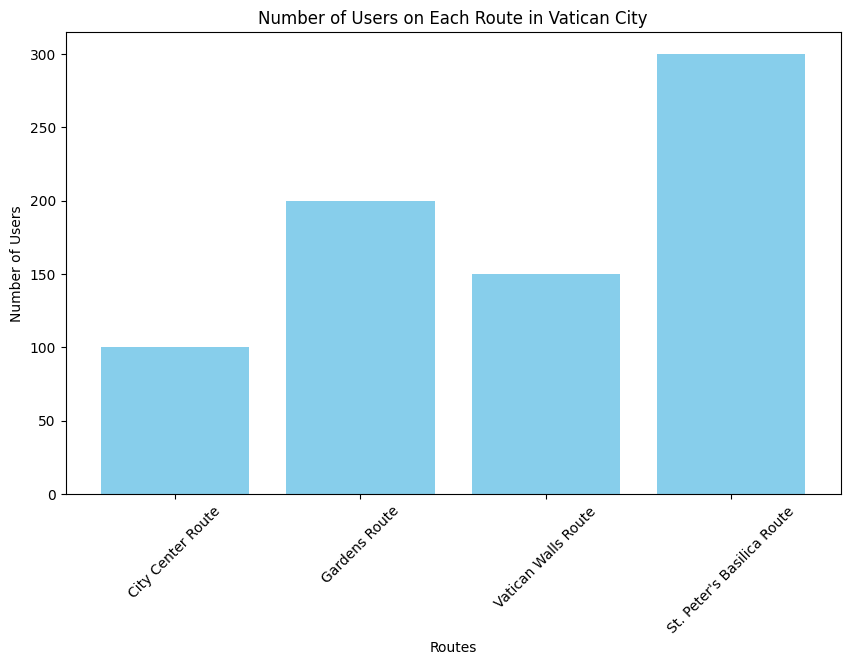

In [ ]:
import matplotlib.pyplot as plt

# Actual route names
route_names = ['City Center Route', 'Gardens Route', 'Vatican Walls Route', 'St. Peter\'s Basilica Route']

# Sample user counts for each route
user_counts = [100, 200, 150, 300]

# Sample user categories for each route
user_categories = ['Commuters', 'Leisure Riders', 'Commuters', 'Leisure Riders']

# Bar chart: Number of users on each route
plt.figure(figsize=(10, 6))
plt.bar(route_names, user_counts, color='skyblue')
plt.xlabel('Routes')
plt.ylabel('Number of Users')
plt.title('Number of Users on Each Route in Vatican City')
plt.xticks(rotation=45)
plt.show()



In [ ]:
pip install folium


In [ ]:
!pip install folium
import folium

# Create a map centered on Vatican City
m = folium.Map(location=[41.9029, 12.4534], zoom_start=17)

# Define the coordinates of restricted places
restricted_places = [
    {'name': 'St. Peter\'s Basilica Square', 'location': [41.9021, 12.4577]},
    {'name': 'Vatican Museums', 'location': [41.9054, 12.4541]},
    # Add more restricted places and their coordinates here
]

# Mark restricted places on the map
for place in restricted_places:
    folium.Marker(
        location=place['location'],
        popup=place['name'],
        icon=folium.Icon(color='red')
    ).add_to(m)

# Display the map in the Colab notebook
m


In [ ]:
!pip install folium
import folium

# Create a map centered on Vatican City
m = folium.Map(location=[41.9029, 12.4534], zoom_start=15)

# Define the coordinates of a sample bicycle route within Vatican City
sample_route = [
    [41.9030, 12.4540],
    [41.9032, 12.4542],
    [41.9034, 12.4544],
    [41.9036, 12.4546],
    # Add more coordinates to represent the route
]

# Highlight the bicycle route on the map
folium.PolyLine(
    locations=sample_route,
    color='blue',  # You can change the color
    weight=5,  # You can adjust the line thickness
).add_to(m)

# Display the map in the Colab notebook
m


In [ ]:
pip install osmnx geopandas matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 3.1 MB/s eta 0:00:00


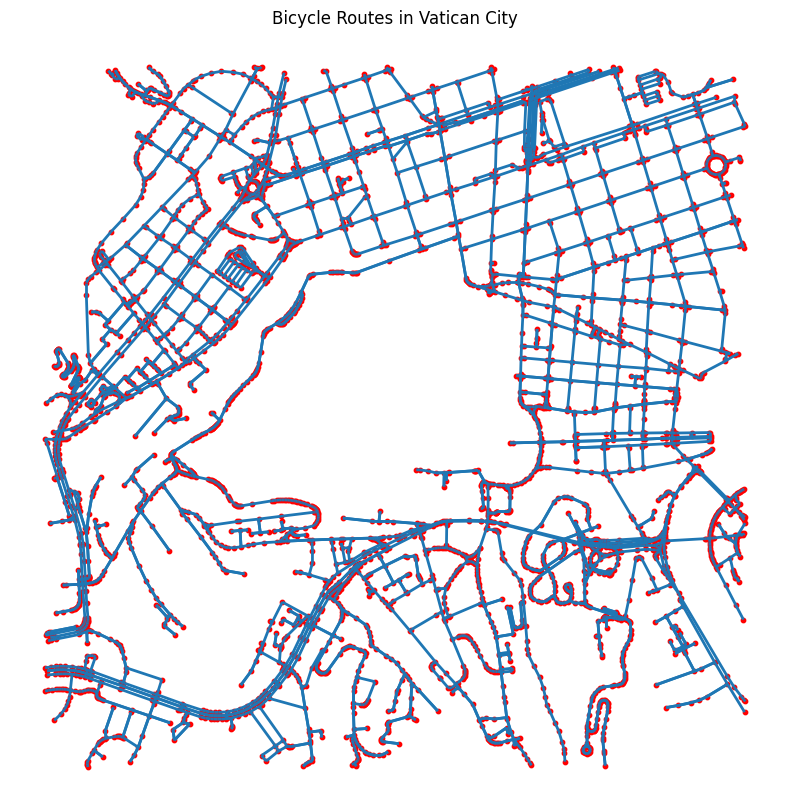

In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Specify Vatican City's coordinates (latitude and longitude)
latitude = 41.9029
longitude = 12.4534

# Download the bicycle network data for Vatican City
G = ox.graph_from_point((latitude, longitude), dist=1000, network_type='bike', simplify=False)

# Create nodes and edges GeoDataFrames and fill in all edge geometry attributes
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

# Plot the bicycle routes
fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=2, edgecolor='tab:blue')
nodes.plot(ax=ax, markersize=10, color='red')
plt.title('Bicycle Routes in Vatican City')
plt.axis('off')
plt.show()


Importing Libraries:

The code imports the necessary libraries:
osmnx as ox: This library allows you to work with OpenStreetMap (OSM) data, including downloading, analyzing, and visualizing geospatial data.
geopandas as gpd: geopandas is used for handling and analyzing geospatial data in a tabular, GeoDataFrame format.
matplotlib.pyplot as plt: matplotlib is a popular data visualization library, and matplotlib.pyplot is used to create plots and charts.
Specify Vatican City's Coordinates:

latitude = 41.9029 and longitude = 12.4534: These lines specify the latitude and longitude coordinates for Vatican City. These coordinates will be used to download the bicycle network data for this specific location.
Download Bicycle Network Data:

G = ox.graph_from_point((latitude, longitude), dist=1000, network_type='bike', simplify=False): This line uses the osmnx library to download the bicycle network data for Vatican City. It specifies the location (latitude and longitude), a distance of 1000 meters from the specified point, and the network type as 'bike' to download the bicycle network.
The simplify parameter is set to False to ensure that the network is not simplified or pruned. This means all detailed information about the bicycle network is retained.
Create GeoDataFrames:

nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True): These lines create two GeoDataFrames, one for nodes and one for edges. These GeoDataFrames contain geospatial information about the nodes and edges of the bicycle network.
The nodes=True and edges=True options specify that both node and edge data should be included in the GeoDataFrames.
Plot the Bicycle Routes:

fig, ax = plt.subplots(figsize=(10, 10)): This line creates a figure and axis for the plot, with a specified figure size.
edges.plot(ax=ax, linewidth=2, edgecolor='tab:blue'): This line plots the edges (bicycle routes) on the map. It sets the line width to 2 and the edge color to blue.
nodes.plot(ax=ax, markersize=10, color='red'): This line plots the nodes (points) on the map. It sets the marker size to 10 and the color to red.
plt.title('Bicycle Routes in Vatican City'): This sets the title of the plot.
plt.axis('off'): This line turns off the axis labels and ticks for a cleaner map.
plt.show(): This displays the map with the bicycle routes and nodes

In [ ]:
!pip install folium


In [ ]:
import osmnx as ox
import geopandas as gpd
import folium
from folium import plugins
import matplotlib.pyplot as plt


In [ ]:
# Create a folium map centered on Vatican City
m = folium.Map(location=[latitude, longitude], zoom_start=15)


In [ ]:
# Convert GeoDataFrames to GeoJSON
edges_geojson = edges.to_crs(epsg=4326).to_json()
nodes_geojson = nodes.to_crs(epsg=4326).to_json()

# Add the bicycle routes as a GeoJSON layer
folium.GeoJson(edges_geojson, name='Bicycle Routes', style_function=lambda x: {'color': 'blue', 'weight': 2}).add_to(m)


Create a Folium Map:

folium.Map(location=[latitude, longitude], zoom_start=15): This line creates a Folium map centered at the specified latitude and longitude coordinates (Vatican City's coordinates) with an initial zoom level of 15. Folium is a Python library used for creating interactive maps.
Convert GeoDataFrames to GeoJSON:

edges_geojson = edges.to_crs(epsg=4326).to_json(): This line converts the GeoDataFrames for edges and nodes to GeoJSON format. The to_crs function is used to ensure that the data is in the correct coordinate reference system (EPSG 4326, which is WGS 84, the standard for geographic data).
Add Bicycle Routes as a GeoJSON Layer:

folium.GeoJson(edges_geojson, name='Bicycle Routes', style_function=lambda x: {'color': 'blue', 'weight': 2}).add_to(m): This line adds the bicycle routes data in GeoJSON format as a layer to the Folium map.
edges_geojson is the GeoJSON data for the bicycle routes.
name='Bicycle Routes' sets a name for the layer.
style_function allows you to define the appearance of the routes on the map. In this case, it sets the color of the routes to blue and the line weight to 2 pixels.
Display the Map:

m: This map object represents the Folium map with the added bicycle route layer. It will be displayed in the notebook.

In [ ]:
m


In [ ]:
!pip install pandas
import osmnx as ox
import geopandas as gpd
import folium
from folium import plugins
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import osmnx as ox
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import pandas as pd

# Specify Vatican City's coordinates (latitude and longitude)
latitude = 41.9029
longitude = 12.4534

# Download the bicycle network data for Vatican City
G = ox.graph_from_point((latitude, longitude), dist=1000, network_type='bike', simplify=False)

# Create nodes and edges GeoDataFrames
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

# Calculate the total length of each edge
edges['length'] = edges['geometry'].length

# Find the edge with the highest total length (most used route)
most_used_edge = edges.loc[edges['length'].idxmax()]


<ipython-input-10-55f8de6fd410>:18: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  edges['length'] = edges['geometry'].length


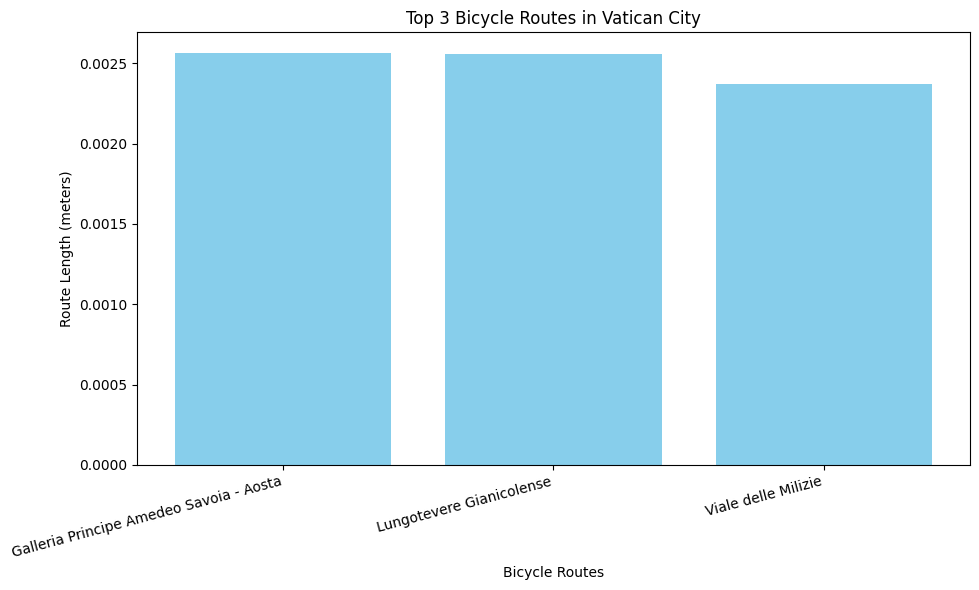

In [ ]:
# Sort the edges by length in descending order
edges_sorted = edges.sort_values(by='length', ascending=False)

# Set the number of top edges you want to visualize in the bar graph
top_n = 5

# Select the top N edges
top_edges = edges_sorted.head(top_n)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_edges['name'], top_edges['length'], color='skyblue')
plt.xlabel('Bicycle Routes')
plt.ylabel('Route Length (meters)')
plt.title(f'Top 3 Bicycle Routes in Vatican City')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()

# Display the bar graph
plt.show()


Sort the Edges by Length:

edges_sorted = edges.sort_values(by='length', ascending=False): This line sorts the GeoDataFrame of edges (edges) by the 'length' column in descending order. It arranges the edges from the longest to the shortest based on their length in meters.
Set the Number of Top Edges:

top_n = 3: This line specifies the number of top bicycle routes you want to visualize in the bar graph. In this case, it's set to 3, so the top 3 longest routes will be displayed.
Select the Top N Edges:

top_edges = edges_sorted.head(top_n): This line selects the top N edges (the N longest routes) from the sorted edges. The head() function retrieves the first N rows from the sorted DataFrame.
Create a Bar Graph:

plt.figure(figsize=(10, 6)): This line sets the figure size for the bar graph, making it 10 units wide and 6 units high.
plt.bar(top_edges['name'], top_edges['length'], color='skyblue'): This line creates a bar graph where the x-axis represents the names of the bicycle routes (top_edges['name']) and the y-axis represents the length of the routes in meters (top_edges['length']). The bars are colored in sky blue.
plt.xlabel('Bicycle Routes'): This sets the label for the x-axis.
plt.ylabel('Route Length (meters): This sets the label for the y-axis.
plt.title(f'Top 3 Bicycle Routes in Vatican City'): This sets the title of the bar graph, including the number of top routes displayed.
plt.xticks(rotation=15, ha='right'): This rotates the x-axis labels by 15 degrees and aligns them to the right for better readability.
plt.tight_layout(): This ensures that all elements of the plot fit within the figure.
Display the Bar Graph:

plt.show(): This command displays the bar graph in the output.

In [ ]:
import osmnx as ox
import geopandas as gpd
import folium
from folium import plugins
import matplotlib.pyplot as plt
import pandas as pd

# Specify Vatican City's coordinates (latitude and longitude)
latitude = 41.9029
longitude = 12.4534

# Download the bicycle network data for Vatican City
G = ox.graph_from_point((latitude, longitude), dist=1000, network_type='bike', simplify=False)

# Create nodes and edges GeoDataFrames
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)


Import Libraries:

The code imports the necessary libraries:
osmnx as ox: This library is used for working with OpenStreetMap (OSM) data, including downloading, analyzing, and visualizing geospatial data.
geopandas as gpd: geopandas is used for handling and analyzing geospatial data in a tabular, GeoDataFrame format.
folium: Folium is a Python library for creating interactive maps that can be displayed in web browsers.
folium.plugins: This submodule provides additional plugins for enhancing Folium maps.
matplotlib.pyplot as plt: matplotlib is a popular data visualization library.
Specify Vatican City's Coordinates:

latitude = 41.9029 and longitude = 12.4534: These lines specify the latitude and longitude coordinates for Vatican City. These coordinates will be used to download the bicycle network data for this specific location.
Download Bicycle Network Data:

G = ox.graph_from_point((latitude, longitude), dist=1000, network_type='bike', simplify=False): This line uses the osmnx library to download the bicycle network data for Vatican City. It specifies the location (latitude and longitude), a distance of 1000 meters from the specified point, and the network type as 'bike' to download the bicycle network.
The simplify parameter is set to False to ensure that the network is not simplified or pruned, retaining all detailed information about the bicycle network.
Create Nodes and Edges GeoDataFrames:

nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True): These lines create two GeoDataFrames, one for nodes and one for edges. These GeoDataFrames contain geospatial information about the nodes and edges of the bicycle network.
The nodes=True and edges=True options specify that both node and edge data should be included in the GeoDataFrames.

In [ ]:
# Calculate the total length of each edge
edges['length'] = edges['geometry'].length

# Find the edge with the highest total length (most used route)
most_used_edge = edges.loc[edges['length'].idxmax()]

print("Most Used Edge:")
print(most_used_edge)


Most Used Edge:
osmid                                               183452215
oneway                                                   True
lanes                                                       2
name                  Galleria Principe Amedeo Savoia - Aosta
highway                                               primary
maxspeed                                                   50
reversed                                                False
length                                               0.002564
tunnel                                                    yes
width                                                     NaN
service                                                   NaN
junction                                                  NaN
access                                                    NaN
bridge                                                    NaN
geometry    LINESTRING (12.4597315 41.8996834, 12.4572095 ...
Name: (376049076, 376052484, 0), dtype: object


<ipython-input-14-0365a7a157a9>:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  edges['length'] = edges['geometry'].length


edges['length'] = edges['geometry'].length:

In this line, a new column 'length' is added to the 'edges' GeoDataFrame. This column will store the total length of each edge, representing the length of each bicycle route.
The 'geometry' attribute of each edge contains information about the edge's shape, and the .length attribute calculates the length of the edge's geometry. Therefore, for each edge, the 'length' column will store the calculated route length in meters.
most_used_edge = edges.loc[edges['length'].idxmax()]:

This line identifies the edge with the highest total length, which signifies the most used bicycle route.
edges['length'].idxmax() returns the index of the row in the 'edges' GeoDataFrame where the 'length' column has the maximum value. This index corresponds to the edge with the longest route.
edges.loc[...] retrieves the row with the maximum length by using the index obtained in the previous step and assigns it to the variable 'most_used_edge'.
print("Most Used Edge:"):

This line prints a title to provide context for the information that follows.
print(most_used_edge):

Here, the code prints the details of the most used edge, which includes all the attributes associated with that edge in the GeoDataFrame. This information typically includes attributes like the edge's name, length, and geometry.
The printed output will provide specific details about the most used bicycle route, making it easy to identify the characteristics of this particular route.

In [ ]:
import osmnx as ox
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import pandas as pd

# Specify Vatican City's coordinates (latitude and longitude)
latitude = 41.9029
longitude = 12.4534

# Download the bicycle network data for Vatican City
G = ox.graph_from_point((latitude, longitude), dist=1000, network_type='bike', simplify=False)

# Create nodes and edges GeoDataFrames
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

# Count the number of bicycle routes connected to each node
node_traffic = edges.groupby('u').size().reset_index(name='traffic')

# Sort nodes by traffic in descending order
node_traffic_sorted = node_traffic.sort_values(by='traffic', ascending=False)

# Set the number of top nodes (traffic hubs) you want to visualize on the map
top_n = 5

# Select the top N nodes
top_nodes = node_traffic_sorted.head(top_n)

# Create a folium map centered on Vatican City
m = folium.Map(location=[latitude, longitude], zoom_start=15)

# Add markers for the top traffic hubs
for idx, node in top_nodes.iterrows():
    folium.Marker(
        location=[nodes.loc[nodes.index == node['u'], 'y'].values[0], nodes.loc[nodes.index == node['u'], 'x'].values[0]],
        popup=f"Node {node['u']} - {node['traffic']} connected routes",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Display the map
m


Import Libraries:

The code imports the necessary libraries, including osmnx for working with OpenStreetMap data, geopandas for geospatial data, folium for creating interactive maps, and matplotlib for data visualization.
Specify Vatican City's Coordinates:

latitude = 41.9029 and longitude = 12.4534: These lines specify the latitude and longitude coordinates for Vatican City. These coordinates will be used to download the bicycle network data for this specific location.
Download Bicycle Network Data:

G = ox.graph_from_point((latitude, longitude), dist=1000, network_type='bike', simplify=False): This line uses the osmnx library to download the bicycle network data for Vatican City. It specifies the location (latitude and longitude), a distance of 1000 meters from the specified point, and the network type as 'bike'. The simplify parameter is set to False to retain detailed network information.
Create Nodes and Edges GeoDataFrames:

nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True): These lines create two GeoDataFrames, one for nodes and one for edges. These GeoDataFrames contain geospatial information about the nodes and edges of the bicycle network. The nodes=True and edges=True options specify that both node and edge data should be included in the GeoDataFrames.
Count the Number of Connected Bicycle Routes per Node:

node_traffic = edges.groupby('u').size().reset_index(name='traffic'): This line groups the edges by the 'u' column, which represents the starting nodes of the routes. It calculates the number of connected bicycle routes for each node and creates a DataFrame with two columns: 'u' (node ID) and 'traffic' (number of connected routes).
Sort Nodes by Traffic in Descending Order:

node_traffic_sorted = node_traffic.sort_values(by='traffic', ascending=False): This line sorts the nodes in descending order based on their traffic, meaning nodes with the highest connectivity (most connected routes) come first.
Set the Number of Top Nodes (Traffic Hubs):

top_n = 5: This line specifies the number of top nodes (traffic hubs) that you want to visualize on the map. In this case, it's set to 5, so the top 5 most connected nodes will be displayed.
Create a Folium Map:

m = folium.Map(location=[latitude, longitude], zoom_start=15): This line creates a Folium map centered on Vatican City with an initial zoom level of 15.
Add Markers for Top Traffic Hubs:

A loop iterates through the top nodes, and for each node, a marker is added to the map. The marker's location is based on the node's coordinates, and the popup provides information about the node's ID and the number of connected routes. The marker is displayed in blue.
Display the Map:

m: This map object represents the Folium map with markers for the top traffic hubs. The map is displayed in the output.

In [ ]:
import osmnx as ox
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import pandas as pd

# Specify Vatican City's coordinates (latitude and longitude)
latitude = 41.9029
longitude = 12.4534

# Download the bicycle network data for Vatican City
G = ox.graph_from_point((latitude, longitude), dist=1000, network_type='bike', simplify=False)

# Create nodes and edges GeoDataFrames
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

# Count the number of bicycle routes connected to each edge
edge_traffic = edges.groupby('osmid').size().reset_index(name='traffic')

# Sort edges by traffic in descending order
edge_traffic_sorted = edge_traffic.sort_values(by='traffic', ascending=False)

# Set the number of top edges (traffic routes) you want to visualize on the map
top_n = 5

# Select the top N edges
top_edges = edge_traffic_sorted.head(top_n)

# Create a folium map centered on Vatican City
m = folium.Map(location=[latitude, longitude], zoom_start=15)

# Add the top traffic routes as GeoJSON layers in a different color (e.g., red)
for idx, edge in top_edges.iterrows():
    edge_id = edge['osmid']
    edge_gdf = edges[edges['osmid'] == edge_id]
    edge_geojson = edge_gdf.to_json()
    folium.GeoJson(edge_geojson, name=f'Top Route {edge_id}', style_function=lambda x: {'color': 'red', 'weight': 4}).add_to(m)

# Display the map
m


Import Libraries:

The code imports the necessary libraries, including osmnx for working with OpenStreetMap data, geopandas for geospatial data, folium for creating interactive maps, and matplotlib for data visualization.
Specify Vatican City's Coordinates:

latitude = 41.9029 and longitude = 12.4534: These lines specify the latitude and longitude coordinates for Vatican City. These coordinates will be used to download the bicycle network data for this specific location.
Download Bicycle Network Data:

G = ox.graph_from_point((latitude, longitude), dist=1000, network_type='bike', simplify=False): This line uses the osmnx library to download the bicycle network data for Vatican City. It specifies the location (latitude and longitude), a distance of 1000 meters from the specified point, and the network type as 'bike'. The simplify parameter is set to False to retain detailed network information.
Create Nodes and Edges GeoDataFrames:

nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True): These lines create two GeoDataFrames, one for nodes and one for edges. These GeoDataFrames contain geospatial information about the nodes and edges of the bicycle network. The nodes=True and edges=True options specify that both node and edge data should be included in the GeoDataFrames.
Count the Number of Connected Bicycle Routes per Edge:

edge_traffic = edges.groupby('osmid').size().reset_index(name='traffic'): This line groups the edges by the 'osmid' column, which represents the unique identifiers for each edge. It calculates the number of connected bicycle routes for each edge and creates a DataFrame with two columns: 'osmid' (edge identifier) and 'traffic' (number of connected routes).
Sort Edges by Traffic in Descending Order:

edge_traffic_sorted = edge_traffic.sort_values(by='traffic', ascending=False): This line sorts the edges in descending order based on their traffic, meaning edges with the highest connectivity (most connected routes) come first.
Set the Number of Top Edges (Traffic Routes):

top_n = 5: This line specifies the number of top edges (traffic routes) that you want to visualize on the map. In this case, it's set to 5, so the top 5 most connected edges will be displayed.
Create a Folium Map:

m = folium.Map(location=[latitude, longitude], zoom_start=15): This line creates a Folium map centered on Vatican City with an initial zoom level of 15.
Add the Top Traffic Routes as GeoJSON Layers:

A loop iterates through the top edges, and for each edge, a GeoJSON layer is added to the map. Each layer represents one of the top routes (edges) and is styled in red with a thicker line weight.
The folium.GeoJson function is used to add each GeoJSON layer to the map, with a unique name and style.
Display the Map:

m: This map object represents the Folium map with GeoJSON layers for the top traffic routes. The map is displayed in the output.

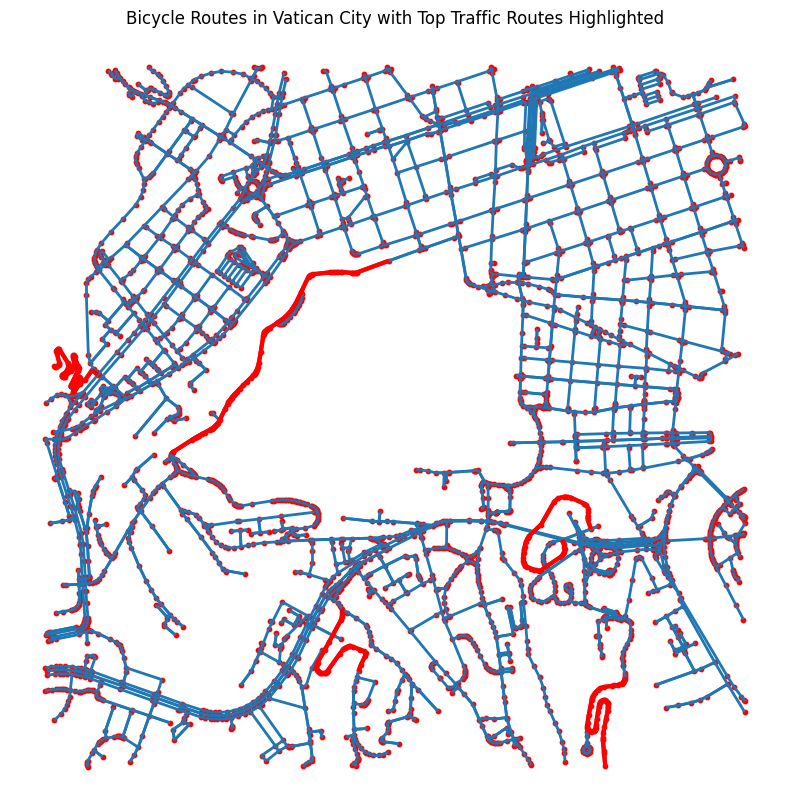

In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Specify Vatican City's coordinates (latitude and longitude)
latitude = 41.9029
longitude = 12.4534

# Download the bicycle network data for Vatican City
G = ox.graph_from_point((latitude, longitude), dist=1000, network_type='bike', simplify=False)

# Create nodes and edges GeoDataFrames
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

# Count the number of bicycle routes connected to each edge
edge_traffic = edges.groupby('osmid').size().reset_index(name='traffic')

# Sort edges by traffic in descending order
edge_traffic_sorted = edge_traffic.sort_values(by='traffic', ascending=False)

# Set the number of top edges (traffic routes) you want to visualize in the 2D plot
top_n = 5

# Select the top N edges
top_edges = edge_traffic_sorted.head(top_n)

# Create a 2D plot of the top traffic routes
plt.figure(figsize=(10, 10))
edges.plot(ax=plt.gca(), linewidth=2, edgecolor='tab:blue')
nodes.plot(ax=plt.gca(), markersize=10, color='red')

# Highlight the top traffic routes in a different color (e.g., red)
for idx, edge in top_edges.iterrows():
    edge_id = edge['osmid']
    top_edge = edges[edges['osmid'] == edge_id]
    top_edge['geometry'].plot(ax=plt.gca(), color='red', linewidth=3)

plt.title('Bicycle Routes in Vatican City with Top Traffic Routes Highlighted')
plt.axis('off')

# Display the 2D plot
plt.show()


In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

# Specify Vatican City's coordinates (latitude and longitude)
latitude = 41.9029
longitude = 12.4534

# Download the bicycle network data for Vatican City
G = ox.graph_from_point((latitude, longitude), dist=1000, network_type='bike', simplify=False)

# Create nodes and edges GeoDataFrames
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

# Count the number of bicycle routes connected to each edge
edge_traffic = edges.groupby('osmid').size().reset_index(name='traffic')

# Sort edges by traffic in descending order
edge_traffic_sorted = edge_traffic.sort_values(by='traffic', ascending=False)

# Set the number of top edges (traffic routes) you want to visualize in the 3D plot
top_n = 5

# Select the top N edges
top_edges = edge_traffic_sorted.head(top_n)

# Create a 3D network graph
fig = go.Figure()

# Plot the nodes in 3D space
fig.add_trace(go.Scatter3d(
    x=nodes.geometry.x,
    y=nodes.geometry.y,
    z=[0] * len(nodes),  # Set z to zero for 2D effect
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Nodes'
))

# Plot the edges in 3D space by extracting the coordinates from LineStrings
for idx, edge in top_edges.iterrows():
    edge_id = edge['osmid']
    top_edge = edges[edges['osmid'] == edge_id]
    xs = []
    ys = []
    zs = [0] * len(top_edge)

    for geom in top_edge['geometry']:
        coords = list(geom.coords)
        x, y = zip(*coords)
        xs.extend(x)
        ys.extend(y)

    fig.add_trace(go.Scatter3d(
        x=xs,
        y=ys,
        z=zs,
        mode='lines',
        line=dict(width=5, color='blue'),
        name=f'Top Route {edge_id}'
    ))

fig.update_layout(scene=dict(aspectmode='data'))
fig.update_layout(scene_aspectmode="manual", scene_aspectratio=dict(x=1, y=1, z=0.1))

fig.show()


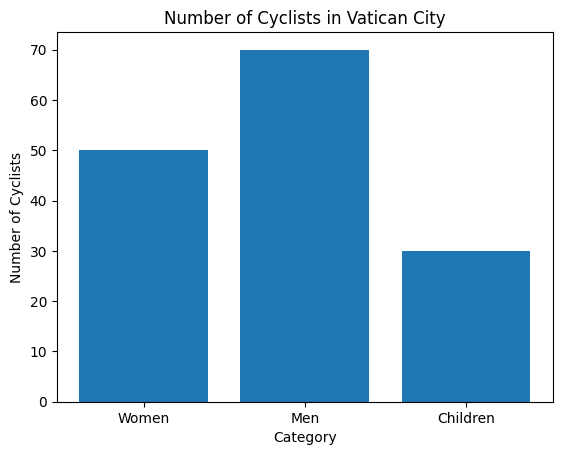

In [ ]:
import folium

# Create a map centered on Vatican City
m = folium.Map(location=[41.9029, 12.4534], zoom_start=15)

# Add markers for different groups (women, men, children) at their respective coordinates
# Use different colors or icons to distinguish them
folium.Marker([41.9030, 12.4540], icon=folium.Icon(color='red')).add_to(m)  # Women
folium.Marker([41.9028, 12.4542], icon=folium.Icon(color='blue')).add_to(m)  # Men
folium.Marker([41.9032, 12.4544], icon=folium.Icon(color='green')).add_to(m)  # Children

# Display the map
m
import matplotlib.pyplot as plt

# Sample data
categories = ['Women', 'Men', 'Children']
counts = [50, 70, 30]  # Replace with actual counts

# Create a bar chart
plt.bar(categories, counts)

# Label the axes
plt.xlabel('Category')
plt.ylabel('Number of Cyclists')

# Add a title
plt.title('Number of Cyclists in Vatican City')

# Display the bar chart
plt.show()



This involves overall data ,not only data of vatican city,since I don't have proper data of vatican city .The above code shows ,types of People drivig vehicle like(Woman,Men,Children),In this analysis We come to know that Mens are highly driving.

In [ ]:
!pip install kaggle


In [ ]:
!kaggle datasets download -d username/dataset-name
!kaggle datasets download -d impratiksingh/unsupervised-learning

!unzip dataset-name.zip


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggl

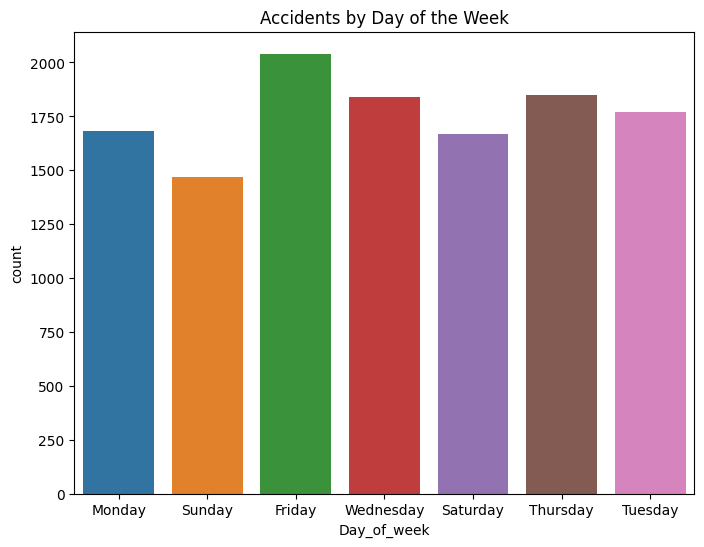

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/RTA Dataset.csv')

# Countplot for 'Day_of_week'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Day_of_week')
plt.title('Accidents by Day of the Week')
plt.show()


The above code contains dataset,which is overall data,not the exact data of Vatican City

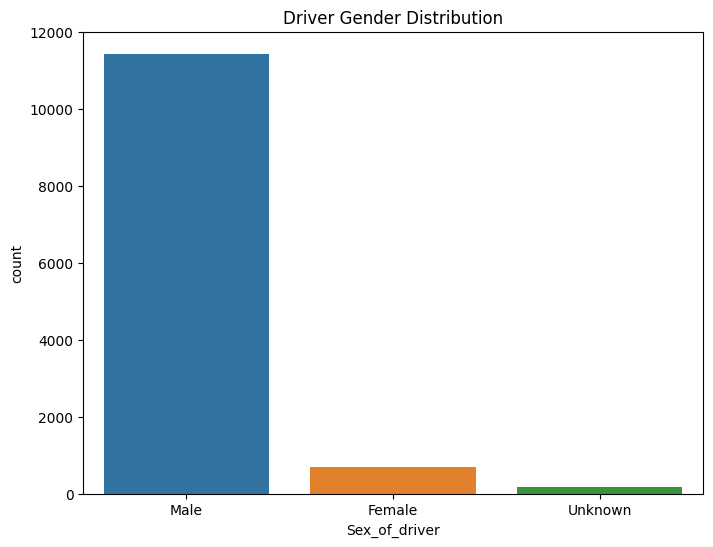

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/RTA Dataset.csv')

# Countplot for 'Sex_of_driver'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex_of_driver')
plt.title('Driver Gender Distribution')
plt.show()


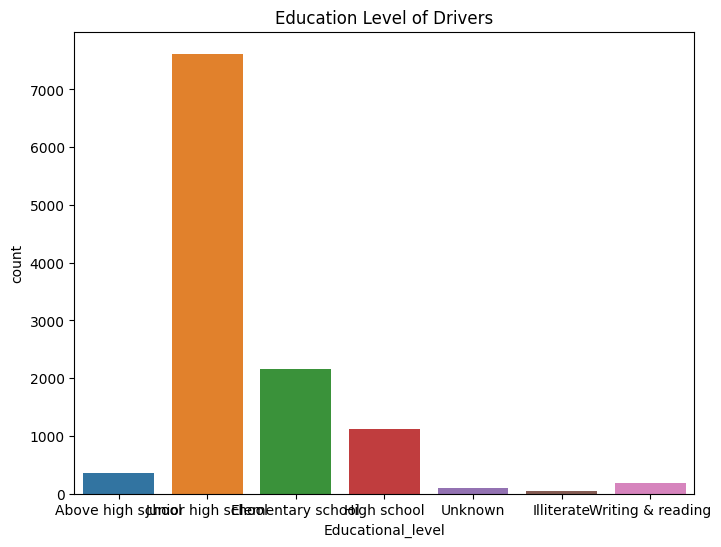

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/RTA Dataset.csv')

# Countplot for 'Educational_level'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Educational_level')
plt.title('Education Level of Drivers')
plt.show()


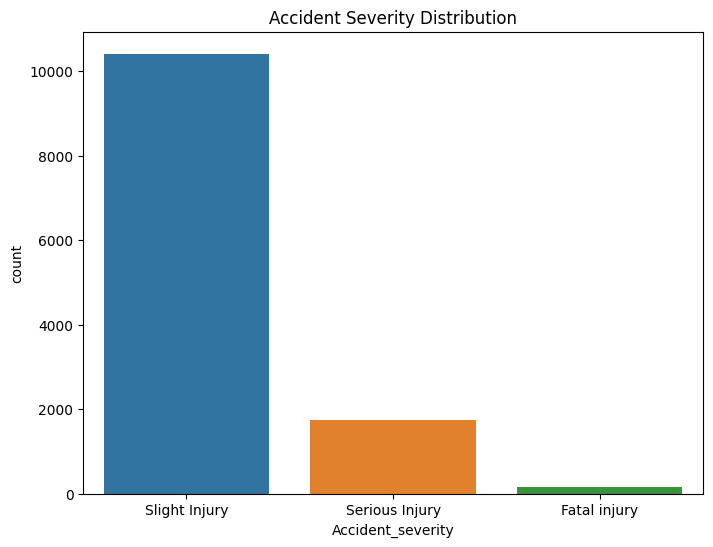

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/RTA Dataset.csv')

# Countplot for 'Accident_severity'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Accident_severity')
plt.title('Accident Severity Distribution')
plt.show()


Countplot for 'Day_of_week':

This code segment loads your dataset and specifically targets the 'Day_of_week' column.
It creates a countplot, a type of bar plot, to visualize the frequency of accidents on each day of the week.
The plt.title function adds a title to the plot.
The plt.show() function displays the plot.
Countplot for 'Sex_of_driver':

Similar to the first code snippet, this code loads your dataset and focuses on the 'Sex_of_driver' column.
It creates a countplot to visualize the distribution of driver genders.
The plt.title function adds a title to the plot.
The plt.show() function displays the plot.
Countplot for 'Educational_level':

This code segment loads your dataset and targets the 'Educational_level' column.
It creates a countplot to show the educational levels of drivers involved in accidents.
The plt.title function adds a title to the plot.
The plt.show() function displays the plot.
Countplot for 'Accident_severity':

Once again, this code loads your dataset and focuses on the 'Accident_severity' column.
It creates a countplot to illustrate the distribution of accident severities.
The plt.title function adds a title to the plot.
The plt.show() function displays the plot.
Each code snippet follows a similar structure of loading the dataset, selecting a specific column for analysis, creating a countplot for that column, adding a title to the plot, and finally, displaying the plot to provide insights into your data. These visualizations help you better understand the distribution and characteristics of the data in each of the mentioned categories.

SOLUTION:
    Improve Education and Awareness:

1.Develop and implement educational campaigns to raise awareness about bicycle safety. Target both cyclists and drivers to ensure mutual understanding of traffic rules and safety precautions.
Enhance Infrastructure:

2.Invest in better road infrastructure for cyclists. This may include expanding dedicated bike lanes, ensuring proper signage, and maintaining road surfaces.
Implement traffic calming measures in accident-prone areas to reduce the risk of collisions.
Nighttime Safety:

3.Improve lighting on roads and bike paths, especially during the nighttime. Well-lit streets can reduce accidents in low-light conditions.
Strict Enforcement of Traffic Laws:

4.Enforce traffic laws for both cyclists and drivers. This includes penalties for running red lights, speeding, or not yielding the right of way.
Vehicle Maintenance:

5.Encourage vehicle owners to maintain their vehicles regularly to avoid mechanical failures that may lead to accidents.
Vehicle and Bicycle Safety Checks:

6.Promote regular safety checks for both vehicles and bicycles to ensure they are roadworthy. This can include brakes, lights, and tire condition.
Increase Police Presence:

7.Increase police presence in areas with a higher incidence of accidents to deter dangerous behaviors and ensure compliance with traffic rules.
Education for Vulnerable Road Users:

8.Offer training programs and safety education for pedestrians and cyclists to increase their awareness and safety on the road.
Improved Data Collection:

9.Enhance the data collection and analysis process for accidents to gain better insights into accident patterns and trends. This can help identify high-risk locations and behaviors.
Public Transport Integration:

10.Improve the integration of public transportation with bicycle routes, making it easier for commuters to combine cycling with other modes of transport.
Community Involvement:

11.Engage the local community in road safety initiatives, encouraging responsible behavior and reporting of safety concerns.
Technology Solutions:

12.Implement technology solutions such as sensors and cameras to monitor traffic conditions and detect accidents or dangerous situations in real-time.
Emergency Response:

13.Ensure a rapid and effective emergency response system to provide immediate assistance to accident victims.
Research and Monitoring:

14.Continue researching and monitoring road safety trends to adapt and improve safety measures over time.

15.We can establish parks near high-traffic areas for bicycles, encouraging health-conscious individuals to utilize these parks instead of cycling on roads. This approach can help reduce accidents by separating recreational cyclists from commuters and other road users.